<a href="https://colab.research.google.com/github/fillipesansilva/Livraria/blob/master/exec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset: https://www.nature.com/articles/sdata201555

This dataset contains two months of network traffic data (November/2013 to December/2013).
The area is composed of a grid overlay of 10.000 squares with a size of about 235 $\times$ 235 meters.
Every time a mobile user engages a telecommunication interaction to a Radio Base Station (RBS), a Call Detail Record (CDR) is recorded.
This information is then compiled into 10-minute intervals.


*We using only 1 grid in this experiment (grid1).

*First colmun = network traffic (amount of CDR)

*Second colmun = timestamp

In [ ]:
count = 0
with open("/content/drive/My Drive/Colab Notebooks/semana1/grid1") as grid:
  for line in grid:
    print(line.rstrip())
    count +=1
    if count == 10: break

11.028366381681,???
11.1271008756737,AAA
10.8927706027911,CC
8.62242459098975,DD
8.00992746244576,EE
8.1184195540896,2013-11-01 00:50:00
8.02626974851215,2013-11-01 01:00:00
8.51417857718389,2013-11-01 01:10:00
6.83342489638405,2013-11-01 01:20:00
6.55460504454769,FFF



(Missing data) -  The "second" colmun must be a timestamp YYYY-MM-DD HH::MM::ss, not "???", "AAA", "CC".

*timestamp start from 2013-11-01 00:00:00 to 2014-01-01 23:50:00.

Solution:

In [ ]:
import numpy as np
import datetime

#LINES: 8928

possibilidades = []
for x in range(1383264000, 1388620200 + 1, 600):
	possibilidades.append(float(x))

for i in range(1,2):

	path = "/content/drive/My Drive/Colab Notebooks/semana1/grid"+ str(i)
	pathw = "/content/drive/My Drive/Colab Notebooks/semana1/new_grid"+ str(i)
	
	n_grid = open(pathw, "w")

	print(i)

	with open(path, "r") as grid:
		for gr in grid:

			try:
				gr = gr.rstrip().split(",")
				request = float(gr[0])
				date = gr[1]
				datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
				n_grid.write(gr[0] + "," + gr[1]  + "\n")
			except:
				continue

	grid.close()
	n_grid.close()

	df = open(pathw, "r")
	n_linhas = sum(1 for linha in df)
	df.close()

	if(n_linhas != 8928):
	
		timestamp = []
		data = open(pathw, "r")
	
		for dt in data:
			ts = dt.split(",")[1].rstrip()
			timestamp.append(ts)
		
		data.close()

		with open(pathw, "a") as gridw:
			for pos in possibilidades:
				pos = datetime.datetime.utcfromtimestamp(pos).strftime('%Y-%m-%d %H:%M:%S')
				if pos not in timestamp:
					gridw.write("0," + pos + "\n")
			gridw.close()




1


Resultado: arquivo "new_grid" gerado contendo todas as informações de timestamp de 2013-11-01 00:00:00 até 2014-01-01 23:50:00.


Além do problema do timestamp, alguns arquivos "grids" não contém valores de volume de tráfego para determinado timestamp (círculos em vermelho na primeira imagem). 
Para resolver isso, utilizei a média do volume de tráfego das grids vizinhas (segunda imagem).


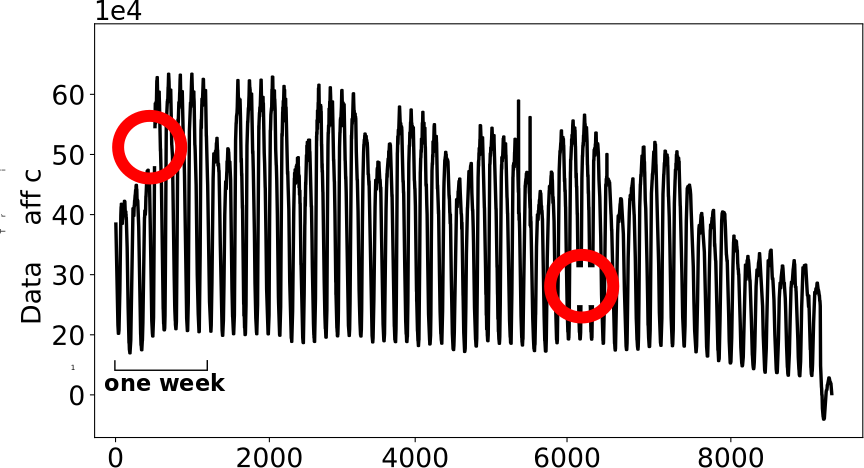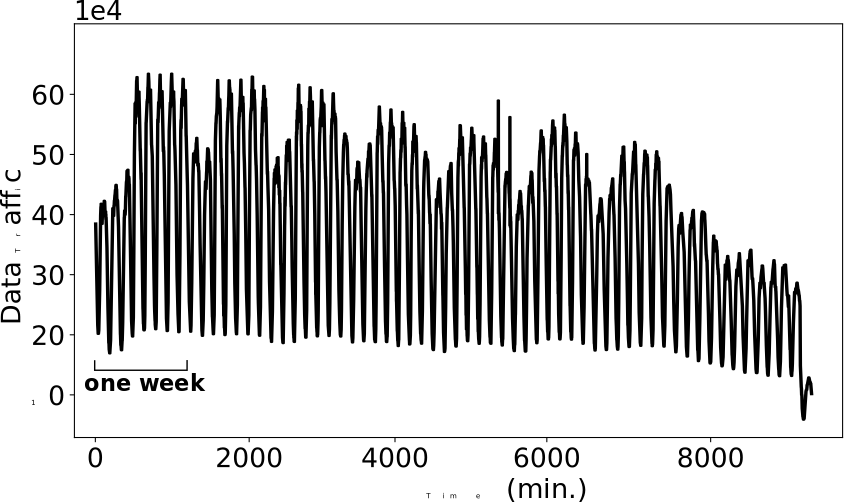
***Não disponibilizei essa parte porque o cálculo é feito utlizando 10.000 datasets, que ultrapassa o limite de armazenamento disponilizado pelo colab.

